# TP 4 : Analyse en composantes principales avec R

## Un esprit sain dans un corps sain

Ce sujet vous donne les moyens de conserver un esprit sain dans un corps sain. Dans un premier temps, il s'agira de prendre les mesures de ce corps à maintenir en forme (données `body.csv`). Pour cela, il est bien connu qu'une activité physique régulière est bénéfique à de nombreux de points de vue (données `athle.csv`) à condition de l'accompagner par une alimentation saine et équilibrée et ce, dès le petit déjeuner (données `cereal.txt`). Pour compléter le tout, un peu de réflexion mathématique mettra le cerveau au niveau de votre corps aguerri et bien alimenté !

## 1. Données `body`

Les données `body` sont composées d'un relevé de 5 variables morphologiques (tour d'épaule, tour de poitrine, tour de taille, masse et taille) chez 20 individus. La première étape consiste à importer ce jeu de données dans R avec la fonction `read.table()` (nous pourrions aussi utiliser `read.csv()` ou `read.csv2()`).

In [35]:
data_body <- read.table("data/body.csv", # Nom du fichier à importer
                        header=TRUE,     # Utiliser la première ligne du fichier pour les noms des colonnes
                        sep=";",         # Séparateur de champs
                        dec=",",         # Séparateur décimal
                        row.names=1)     # Utiliser la première colonne pour les noms des lignes

Pour calculer une ACP sur les données, nous pouvons utiliser la fonction `prcomp()`. Nous stockons le résultat retourné dans un objet appelé `acp_body` de notre espace de travail.

In [3]:
acp_body <- prcomp(data_body)

# Quelques vérifications
cat("Classe de l'objet :", class(acp_body), "\n")
cat("Type de l'objet :", mode(acp_body), "\n")
cat("Test du type 'list' :", is.list(acp_body), "\n")

Classe de l'objet : prcomp 
Type de l'objet : list 
Test du type 'list' : TRUE 


Les composantes de l'objet `acp_body` sont visibles grâce à la fonction `names()`.

In [4]:
names(acp_body)

[1] "sdev"     "rotation" "center"   "scale"    "x"

Pour accéder à un de ces éléments, il faut utiliser l'opérateur `$`.

In [5]:
acp_body$sdev

[1] 15.989241  7.757795  4.846040  2.933938  2.002735

Une description détaillée des éléments contenue dans un objet de la classe `prcomp` est fournie dans l'aide de la fonction `prcomp()`.

In [6]:
help(prcomp)

prcomp                  package:stats                  R Documentation

_P_r_i_n_c_i_p_a_l _C_o_m_p_o_n_e_n_t_s _A_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     Performs a principal components analysis on the given data matrix
     and returns the results as an object of class ‘prcomp’.

_U_s_a_g_e:

     prcomp(x, ...)
     
     ## S3 method for class 'formula'
     prcomp(formula, data = NULL, subset, na.action, ...)
     
     ## Default S3 method:
     prcomp(x, retx = TRUE, center = TRUE, scale. = FALSE,
            tol = NULL, rank. = NULL, ...)
     
     ## S3 method for class 'prcomp'
     predict(object, newdata, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula with no response variable, referring only to
          numeric variables.

    data: an optional data frame (or similar: see ‘model.frame’)
          containing the variables in the formula ‘formula’.  By
          default the variables are taken from ‘environment(

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Que renvoie la fonction <code>summary()</code> appliquée à l'objet <code>acp_body</code> ?</li>
        <li>Utilisez la fonction <code>plot()</code> avec l'objet <code>acp_body</code> pour représenter l'éboulis des valeurs propres. Combien de dimensions semble-t-il raisonnable de retenir pour les représentations graphiques ?</li>
        <li>À l'aide de la fonction <code>biplot</code>, représenter simultanément les individus et les variables sur le premier plan principal (PC1-PC2). Commenter.</li>
        <li>Représenter seulement les individus dans le premier plan principal (voir l'attribut <code>x</code> de l'objet <code>acp_body</code>) avec un codage en 2 couleurs dépendant d'un facteur <code>sexe</code> (les 10 premiers individus étant des hommes, les 10 suivants des femmes) :<br>
            <center><img src="img/body_plan_principal.png"></center></li>
    </ol>
</div>

Importance of components:
                           PC1    PC2     PC3     PC4    PC5
Standard deviation     15.9892 7.7578 4.84604 2.93394 2.0027
Proportion of Variance  0.7264 0.1710 0.06673 0.02446 0.0114
Cumulative Proportion   0.7264 0.8974 0.96414 0.98860 1.0000

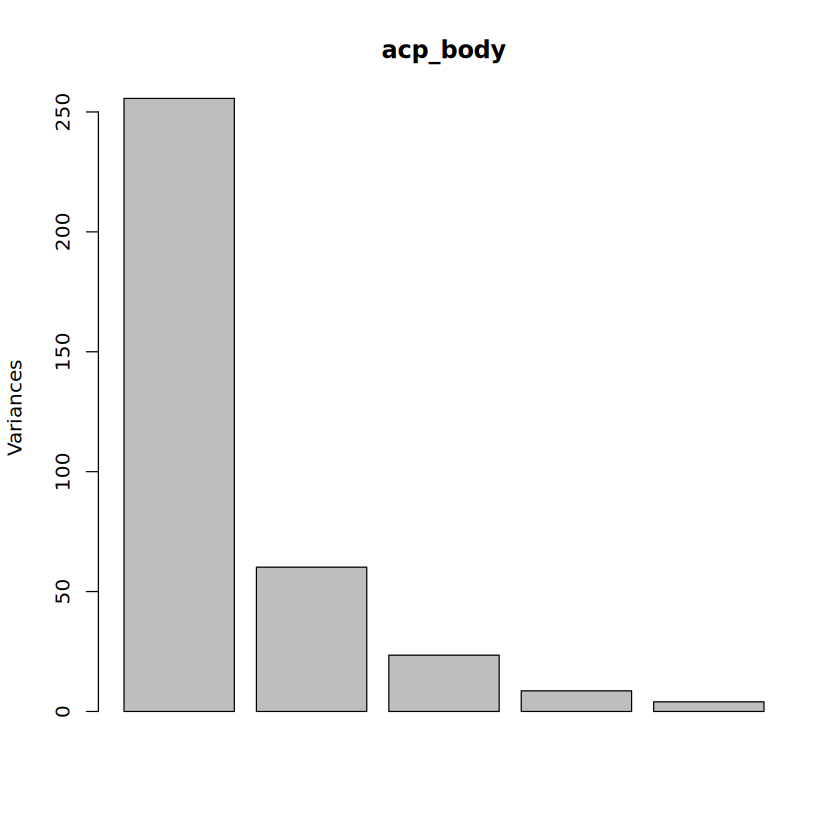

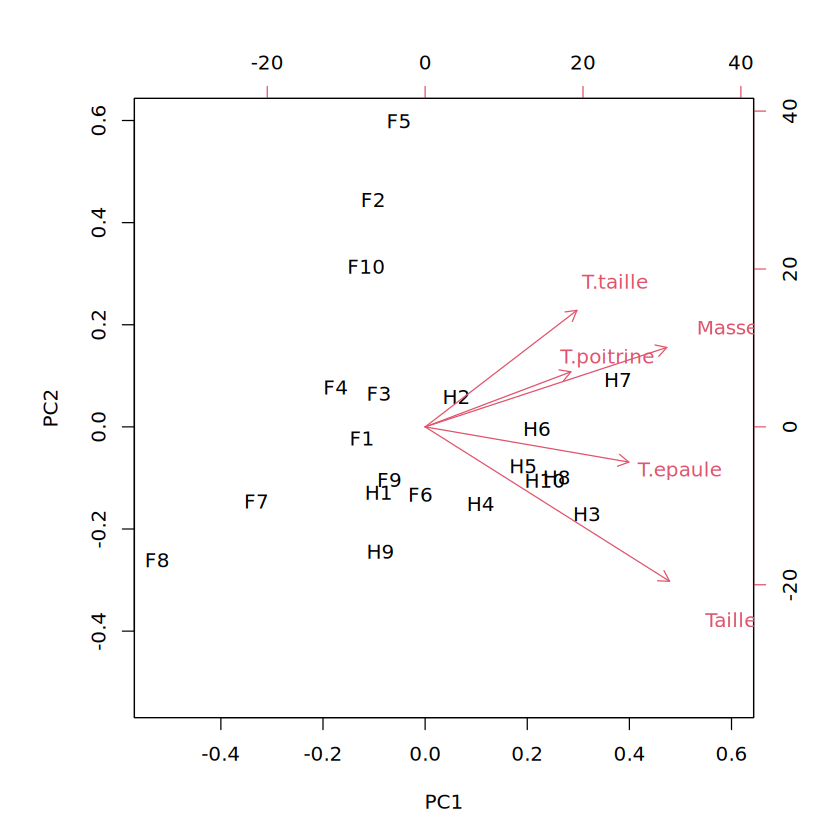

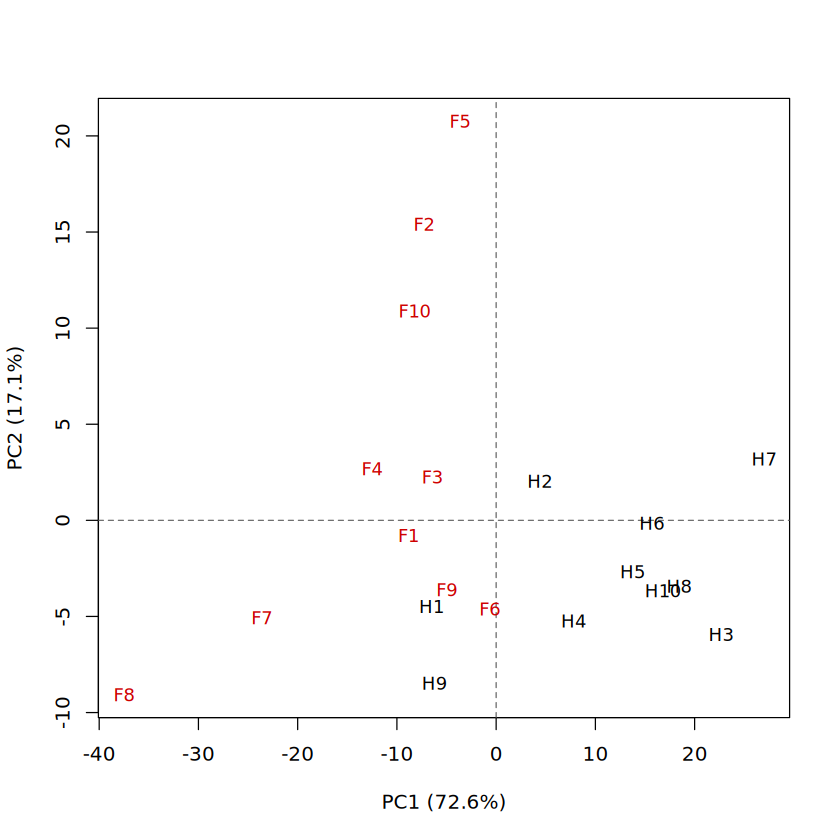

In [17]:
# À FAIRE
summary(acp_body)
par(bg = 'white')  # Fond blanc
plot(acp_body)
biplot(acp_body)
## scores PC1–PC2
scores <- acp_body$x[, 1:2]

## libellés et couleurs (10 hommes puis 10 femmes)
labs <- c(paste0("H", 1:10), paste0("F", 1:10))
cols <- c(rep("black", 10), rep("red3", 10))

## pourcentages de variance pour les étiquettes d’axes
imp  <- summary(acp_body)$importance[2, ]  # Proportion of Variance
xlab <- sprintf("PC1 (%.1f%%)", 100*imp[1])
ylab <- sprintf("PC2 (%.1f%%)", 100*imp[2])

## marges pour respirer
# xr <- expand.range(range(scores[,1]), mul = 0.05)
# yr <- expand.range(range(scores[,2]), mul = 0.05)

## plot vide puis texte
plot(scores, type = "n", xlab = xlab, ylab = ylab)#, xlim = xr, ylim = yr, asp = 1)
abline(h = 0, v = 0, lty = 2, col = "grey40")     # pointillés des axes
text(scores[,1], scores[,2], labels = labs, col = cols, cex = 0.9)


## 2. Données `athle`

Les données `athle` sont constituées d'un relevé des records nationaux d'athlétisme en 2010 de 26 pays pour 9 épreuves de course, du 100m au marathon.

In [19]:
# Importation des données
data_athle <- read.table("data/athle.csv", header=TRUE, dec=",", row.names=1)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer une ACP sur ces données <code>data_athle</code>.</li>
        <li>Représenter l'éboulis des valeurs propres et le diagramme biplot. Commenter.</li>
        <li>Quel(s) pré-traitement(s) vous semble(nt) nécessaire(s) (transformation de données, suppression d'observations atypiques, ...) ? Effectuer quelques manipulations pour produire des résultats d'ACP plus parlants.</li>
    </ol>
</div>

Importance of components:
                            PC1      PC2      PC3     PC4     PC5     PC6
Standard deviation     325.8727 41.31132 20.18163 6.16698 2.52491 1.08938
Proportion of Variance   0.9801  0.01575  0.00376 0.00035 0.00006 0.00001
Cumulative Proportion    0.9801  0.99582  0.99958 0.99993 0.99999 1.00000
                          PC7    PC8     PC9
Standard deviation     0.4803 0.3018 0.06241
Proportion of Variance 0.0000 0.0000 0.00000
Cumulative Proportion  1.0000 1.0000 1.00000

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”


Warning message in doTryCatch(return(expr), name, parentenv, handler):
“zero-length arrow is of indeterminate angle and so skipped”


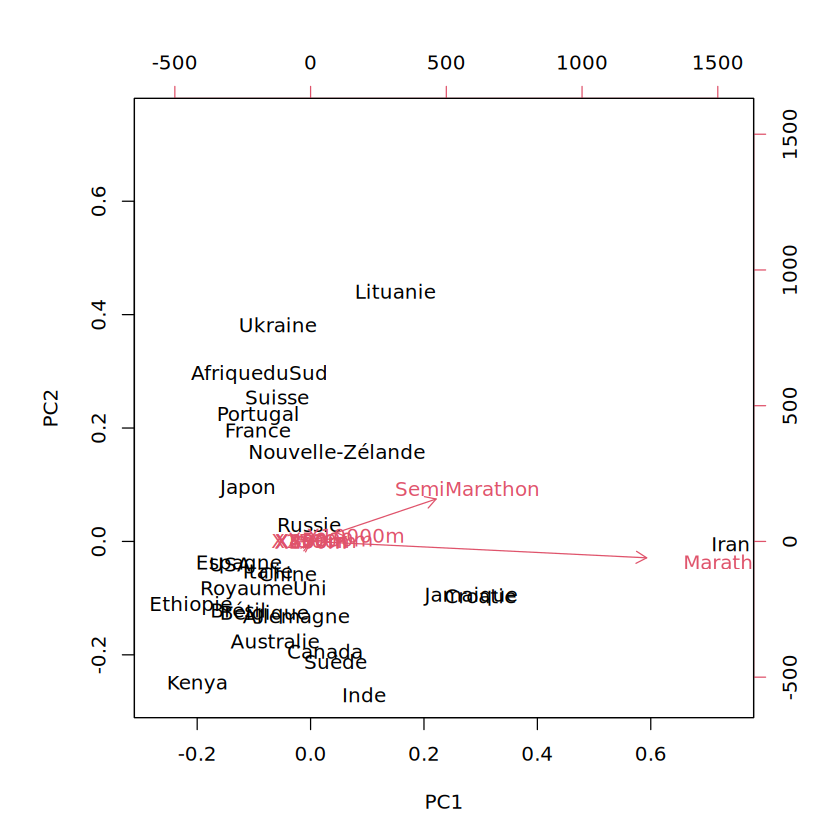

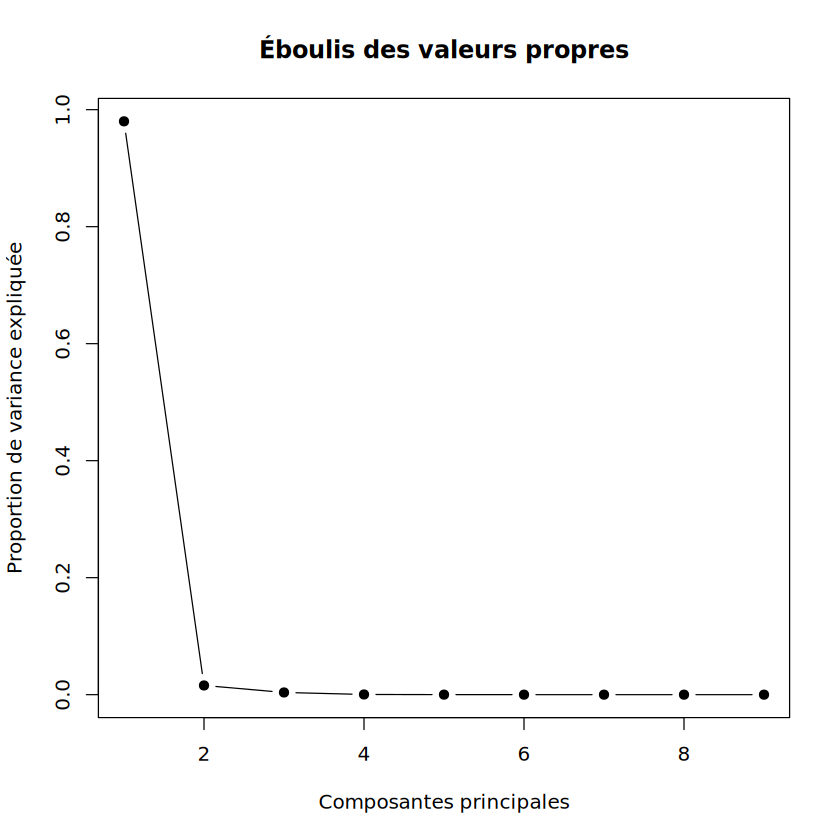

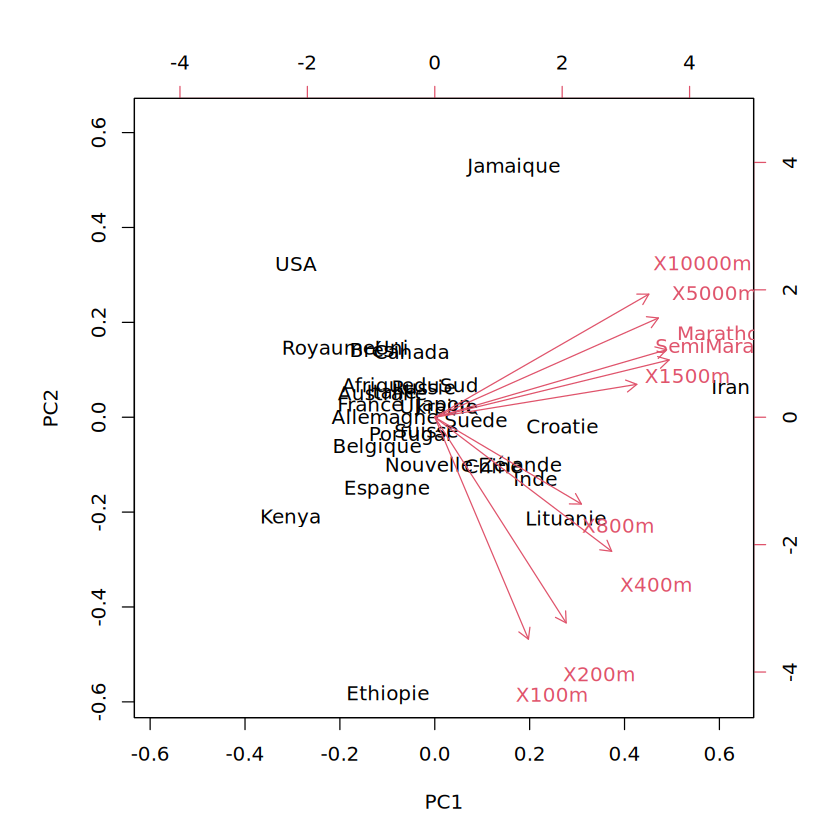

In [27]:
# À FAIRE
par(bg = 'white')  # Fond blanc
acp_athle <- prcomp(data_athle,center = TRUE)
summary(acp_athle)
biplot(acp_athle)
# Éboulis : variance expliquée par chaque axe
scree <- acp_athle$sdev^2        # valeurs propres
prop_var <- scree / sum(scree)   # proportion expliquée

# Plot éboulis
plot(prop_var, type = "b", pch = 19,
     xlab = "Composantes principales",
     ylab = "Proportion de variance expliquée",
     main = "Éboulis des valeurs propres")
# abline(h = 1/ncol(data_athle), col = "red", lty = 2) # seuil de Kaiser
acp_athle_normalise <- prcomp(data_athle, scale. = TRUE, center = TRUE)
biplot(acp_athle_normalise)



## 3. Données `cereal`

Les données `cereal` contiennent la composition (relevée en 1993 aux États-Unis) selon 9 variables quantitatives de 77 types de paquets de céréales consommés au petit-déjeuner. Le fabriquant (variable `mfr`) est également disponible dans le jeu de données.

  * `mfr` Manufacturer of cereal (A: American Home Food Products, G: General Mills, K: Kelloggs, N: Nabisco, P: Post, Q: Quaker Oats, R: Ralston Purina).
  * `calories` Calories per serving.
  * `protein` Grams of protein.
  * `fat` Grams of fat.
  * `sodium` Milligrams of sodium.
  * `fiber` Grams of dietary fiber.
  * `carbo` Grams of complex carbohydrates.
  * `sugars` Grams of sugars.
  * `potass` Milligrams of potassium.
  * `vitamins` Vitamins and minerals (0, 25 or 100, indicating the typical percentage of FDA recommended).

L'analyse de ce jeu de données a fait l'objet d'un concours proposé par l'*American Statistical Association* (sections *Statistical Computing* et *Statistical Graphics*) en 1993 sous le titre "*Serial Correlation or Cereal Correlation ?* " :

*Every two years the Section on Statistical Graphics sponsors a special exposition where one or more data sets are made available, analyzed by anyone interested and presented in a special poster session at the Annual Meeting.*

In [5]:
# Importation des données
data_cereal <- read.table("data/cereal.txt", header=TRUE, row.names=1)

In [6]:
data_cereal

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
100%_Bran,N,70,4,1,130,10.0,5.0,6,280,25
100%_Natural_Bran,Q,120,3,5,15,2.0,8.0,8,135,0
All-Bran,K,70,4,1,260,9.0,7.0,5,320,25
All-Bran_with_Extra_Fiber,K,50,4,0,140,14.0,8.0,0,330,25
Almond_Delight,R,110,2,2,200,1.0,14.0,8,90,25
Apple_Cinnamon_Cheerios,G,110,2,2,180,1.5,10.5,10,70,25
Apple_Jacks,K,110,2,0,125,1.0,11.0,14,30,25
Basic_4,G,130,3,2,210,2.0,18.0,8,100,25
Bran_Chex,R,90,2,1,200,4.0,15.0,6,125,25


Plusieurs packages proposent des fonctions pour calculer une ACP en offrant d'autres options que celles proposées par la fonction `prcomp()`. Un package très populaire dédié à l'analyse exploratoire de données multivariées est [`FactoMineR`](http://factominer.free.fr/) qui est maintenu par une équipe française (d'où les noms français de certains éléments). Nous vous proposons d'utiliser ce package pour le jeu de données `cereal`.

In [3]:
# Chargement du package FactoMineR
options(Ncpus = max(1, parallel::detectCores() - 1))
Sys.setenv(MAKEFLAGS = paste0("-j", getOption("Ncpus")))

install.packages("nloptr")  # d'abord la brique problématique
install.packages(c("lme4","pbkrtest","car"))
install.packages("FactoMineR")
# (facultatif mais utile)
install.packages("factoextra")

#install.packages("nloptr")
library(FactoMineR)

Installing package into ‘/home/mohamed/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

Installing packages into ‘/home/mohamed/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

Installing package into ‘/home/mohamed/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

Installing package into ‘/home/mohamed/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

also installing the dependencies ‘viridis’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’




Le calcul de l'ACP se fait avec la fonction `PCA()` et nous pouvons utiliser l'argument `quali.sup=` pour omettre les variables qualitatives (`FactoMineR` parle de *variable supplémentaire*).

In [7]:
# Calcul de l'ACP
acp_cereal <- PCA(data_cereal, quali.sup=1)

La fonction `plot()` affiche le résultat dans le plan principal pour représenter les individus (`choix="ind"`) ou les variables (`choix="var"`).

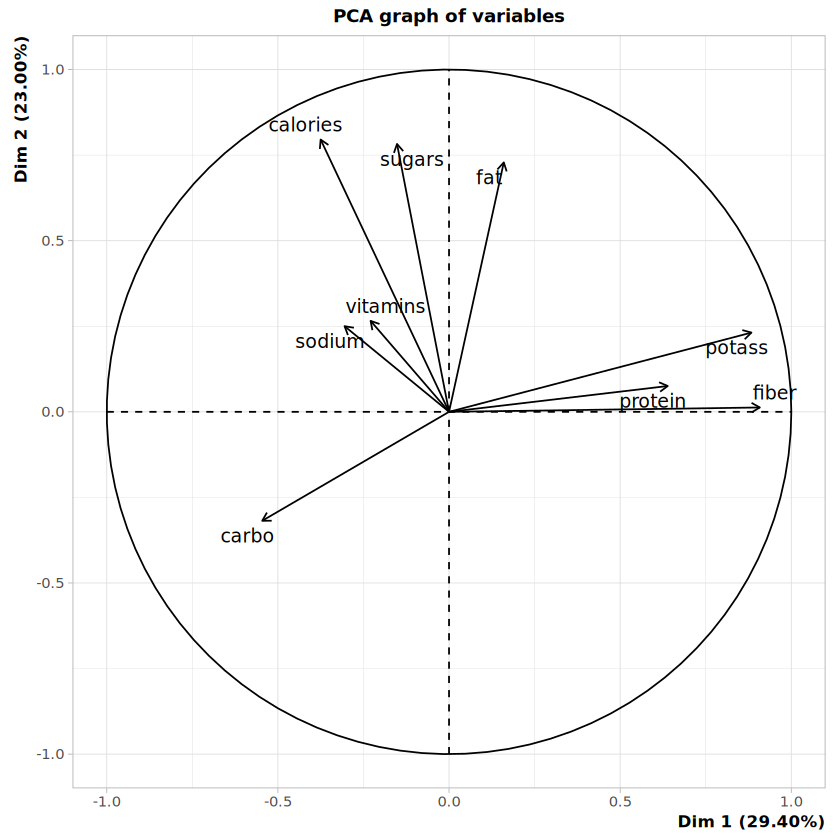

In [8]:
# Représentation des variables dans le plan principal
plot(acp_cereal, choix="var")

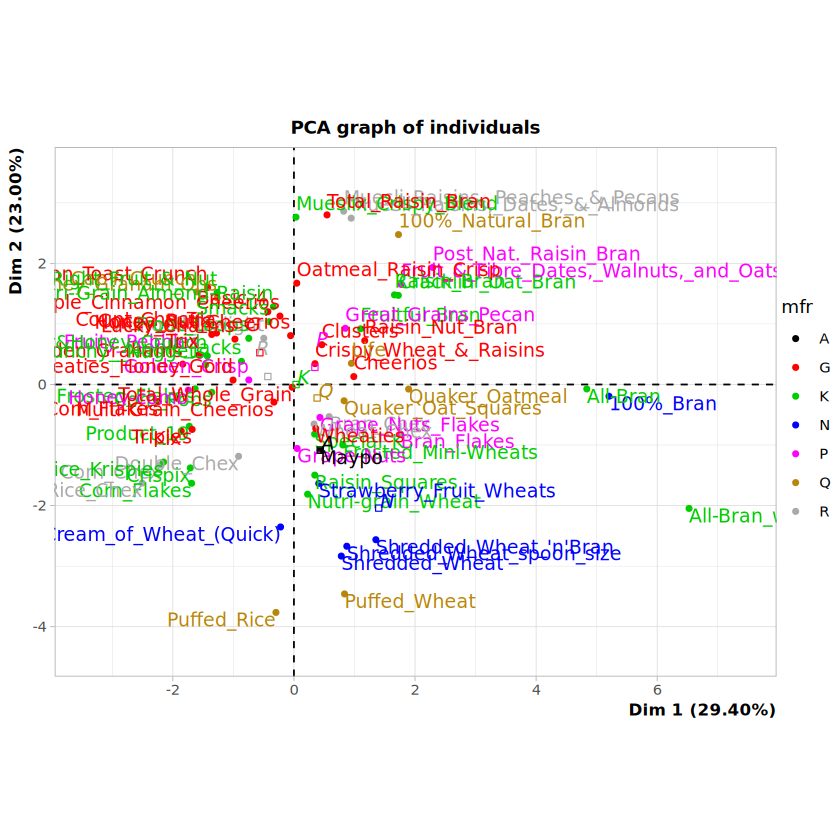

In [9]:
# Représentation des individus dans le plan principal en codant en couleur le fabriquant (colonne 1)
plot(acp_cereal, choix="ind", habillage=1)

<div class="alert alert-block alert-success">
    Pour suivre la recommandation <i>"Ne mange pas trop gras, trop salé, trop sucré"</i>, quelle(s) céréale(s) vaut-il mieux consommer ? Dans quelle zones du graphique de l'ACP se trouvent les céréales à éviter ?
</div>

## 4. Aspects mathématiques

Nous allons travailler avec une matrice à 5 lignes et 3 colonnes dont les éléments sont issus d'un tirage aléatoire sans remise d'entiers entre 1 et 15.

In [10]:
X <- matrix(sample(1:15, size=15), ncol=3)

Nous commençons par calculer l'ACP et représenter le diagramme biplot.

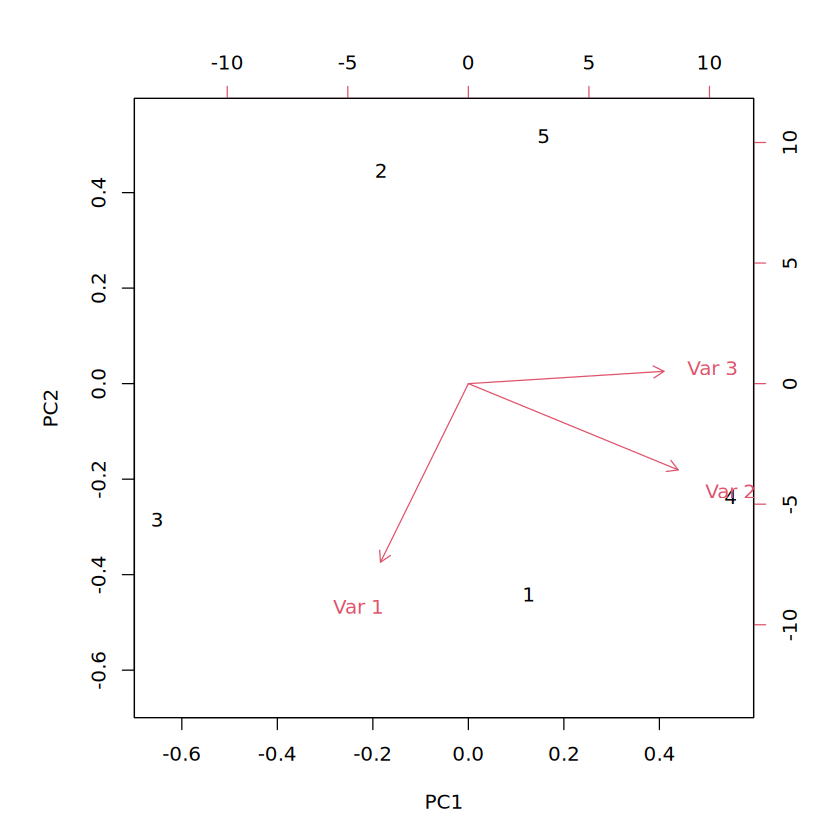

In [12]:
par(bg = 'white')  # Fond blanc
acp <- prcomp(X)
biplot(acp)

L'objectif des manipulations suivantes consiste à retrouver les valeurs issues de l'ACP présentes dans les composants de l'objet `acp` ou dans le résumé de l'objet obtenu avec la fonction `summary()`.

In [13]:
acp

Standard deviations (1, .., p=3):
[1] 6.9559377 4.6065880 0.3070454

Rotation (n x k) = (3 x 3):
            PC1         PC2        PC3
[1,] -0.2929338 -0.89867141  0.3264651
[2,]  0.6994086 -0.43421374 -0.5677024
[3,]  0.6519336  0.06203327  0.7557344

In [14]:
summary(X)

Importance of components:
                          PC1    PC2     PC3
Standard deviation     6.9559 4.6066 0.30705
Proportion of Variance 0.6942 0.3045 0.00135
Cumulative Proportion  0.6942 0.9987 1.00000

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Une ACP étant une diagonalisation de la matrice de covariance, vérifier que les informations renvoyées par <code>prcomp()</code> sont similaires à celles calculées par la fonction <code>eigen()</code>. Commenter les différences si il y en a.</li>
        <li>Où retrouve-t-on les vecteurs propres renvoyés par <code>eigen()</code> dans l'objet <code>acp</code> ? Le signe de ces vecteurs est-il important ?</li>
        <li>Retrouver les résultats de l'ACP en procédant cette fois à la décomposition en valeurs singulières (fonction <code>svd()</code>) stockée dans un objet <code>s</code>.</li>
        <li>Vérifier que les vecteurs singuliers à droite (<code>s&dollar;v</code>) sont bien similaires au composant <code>rotation</code> du résultat de <code>prcomp()</code> et également aux vecteurs propres de la matrice de covariance (éventuellement au signe près).</li>
        <li>Concernant les valeurs singulières, vérifier que l'on retrouve les écarts-types renvoyés par <code>prcomp()</code> et les racines carrées des valeurs propres de la matrice de covariance.</li>
        <li>Retrouver les coordonnées des individus sur les composantes principales données par <code>acp&dollar;x</code>. Pour cela, nous pouvons par exemple faire le produit matriciel des données initiales et des vecteurs propres de la matrice de covariance.</li>
        <li>Procéder à des calculs analogues pour vérifier les calculs d'une ACP réduite (diagonalisation de la matrice des corrélations).</li>
    </ol>
</div>

In [31]:
# À FAIRE
eigen(cov(X))
# valeurs_propres <- acp$sdev^2
# valeurs_propres
# s=svd(cov(X))
# cat('s$v:')
# s$v
# cat('acp$rotation:')
# acp$rotation
X_scaled= Xc <- scale(X, center = TRUE, scale = FALSE)

coord_calc<- X_scaled %*% acp$rotation
head(coord_calc)
head(acp$x)

eigen() decomposition
$values
[1] 48.38506990 21.22065321  0.09427689

$vectors
           [,1]        [,2]       [,3]
[1,]  0.2929338  0.89867141  0.3264651
[2,] -0.6994086  0.43421374 -0.5677024
[3,] -0.6519336 -0.06203327  0.7557344


PC1,PC2,PC3
1.965866,-4.550261,0.26550799
-2.835258,4.593835,-0.31303416
-10.130148,-2.935946,-0.01811533
8.542970,-2.444297,-0.28822450
2.456570,5.336670,0.35386600


PC1,PC2,PC3
1.965866,-4.550261,0.26550799
-2.835258,4.593835,-0.31303416
-10.130148,-2.935946,-0.01811533
8.542970,-2.444297,-0.28822450
2.456570,5.336670,0.35386600


## 4. PCR vs PLS

Les but ici est de comparer les deux approches sur le jeux de données `DatairSDD`. Ce jeux de données contient des informations relative à la qualité de l'air. 
On cherche à expliquer la densité de monoxyne d'azote en fonction des autres variables. On comparera alors plusieurs méthodes de régression.

In [33]:
install.packages("pls")
library("pls")

Installing package into ‘/home/mohamed/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)




Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Ajuster un modèle linéaire. </li>
        <li> Effectuer un régression en composante principale avec la fonction <code>pcr()</code>. </li>
        <li> Effectuer une regression PLS avec la fonction <code>plsr()</code>. </li>
        <li> Comparer les erreurs de ces trois modèles en termes d'erreur quadratique moyenne en fonction de nombre de composantes utilisées. <code>RMESP()</code> </li>
    </ol>
</div>

,PT08.S1.CO.,NMHC.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1360,150,1046,166,1056,113,1692,1268
2,1292,112,955,103,1174,92,1559,972
3,1402,88,939,131,1140,114,1555,1074
4,1376,80,948,172,1092,122,1584,1203
5,1272,51,836,131,1205,116,1490,1110
6,1197,38,750,89,1337,96,1393,949



Call:
lm(formula = data_DatairSDD$NO2.GT. ~ ., data = data_DatairSDD)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.969  -8.293   3.807  15.431  56.346 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   293.25865   43.23584   6.783 1.42e-10 ***
PT08.S1.CO.     0.02718    0.02935   0.926  0.35559    
NMHC.GT.       -0.04654    0.01726  -2.696  0.00764 ** 
PT08.S2.NMHC.   0.06818    0.03710   1.838  0.06767 .  
NOx.GT.         0.76440    0.02786  27.439  < 2e-16 ***
PT08.S3.NOx.   -0.04939    0.02114  -2.336  0.02052 *  
PT08.S4.NO2.   -0.20322    0.02852  -7.125 2.04e-11 ***
PT08.S5.O3.    -0.01935    0.01621  -1.194  0.23404    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.5 on 192 degrees of freedom
Multiple R-squared:  0.8752,	Adjusted R-squared:  0.8706 
F-statistic: 192.3 on 7 and 192 DF,  p-value: < 2.2e-16


Data: 	X dimension: 200 7 
	Y dimension: 200 1
Fit method: svdpc
Number of components considered: 7

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           73.87    59.03    59.93    33.51    29.19    29.44    28.01
adjCV        73.87    58.98    59.88    33.29    29.11    29.36    27.93
       7 comps
CV       27.85
adjCV    27.75

TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X          84.02    91.81    95.96    97.99    99.07    99.69   100.00
NO2.GT.    37.36    37.46    81.90    85.59    85.59    86.97    87.52
Data: 	X dimension: 200 7 
	Y dimension: 200 1
Fit method: kernelpls
Number of components considered: 7

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           73.87    58.08    35.33    29.26    28.81    28.65    28.61
adjCV        73.87 

Warning message in plot.window(...):
“"title" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"title" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"title" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"title" is not a graphical parameter”
Warning message in box(...):
“"title" is not a graphical parameter”
Warning message in title(...):
“"title" is not a graphical parameter”


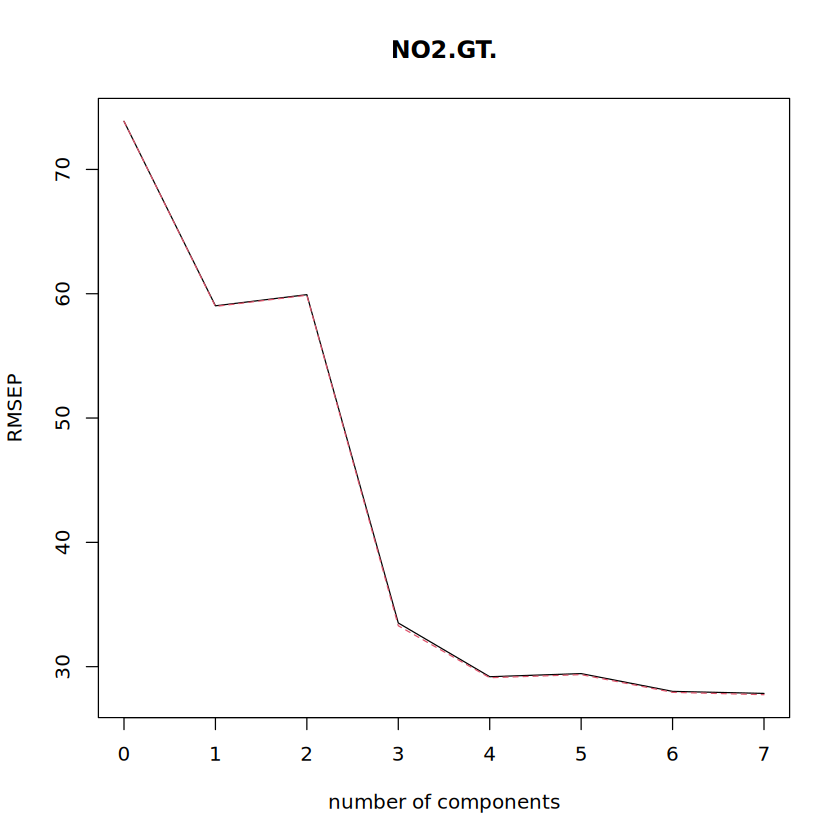

Warning message in plot.window(...):
“"title" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"title" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"title" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"title" is not a graphical parameter”
Warning message in box(...):
“"title" is not a graphical parameter”
Warning message in title(...):
“"title" is not a graphical parameter”


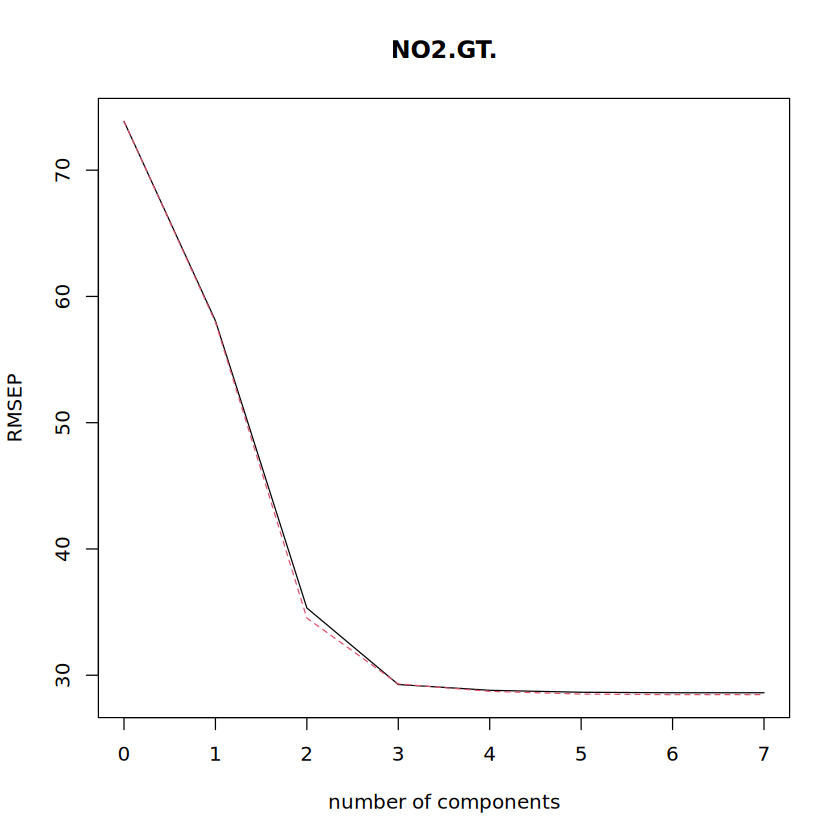

In [ ]:
# À FAIRE
par(bg = 'white')  # Fond blanc
# Importation des données
data_DatairSDD <- read.table("data/DatairSDD.csv", # Nom du fichier à importer
                        header=TRUE,     # Utiliser la première ligne du fichier pour les noms des colonnes
                        sep=",",         # Séparateur de champs
                        row.names=1)     # Utiliser la première colonne pour les noms des lignes
head(data_DatairSDD) 
# y <- data_DatairSDD$NO2.GT
# X <- data_DatairSDD[ , !(names(data_DatairSDD) %in% "NO2.GT")]
# LM
mod_lm   <- lm(data_DatairSDD$NO2.GT. ~ ., data = data_DatairSDD)
summary(mod_lm)
# PCR / PLS (package pls)
library(pls)
mod_pcr  <- pcr(NO2.GT. ~ ., data = data_DatairSDD, scale = TRUE,validation = "CV")
summary(mod_pcr )
mod_plsr <- plsr(NO2.GT. ~ ., data = data_DatairSDD, scale = TRUE,validation = "CV")
summary(mod_plsr )
## 2) RMSE de prédiction (CV) pour PCR/PLSR, par nombre de composantes
#rmsep_lm <- RMSEP(mod_lm ,estimate="CV")

validationplot(mod_pcr, val.type = "RMSEP")
validationplot(mod_plsr, val.type = "RMSEP")
  
